In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report


Bad key "text.kerning_factor" on line 4 in
C:\Users\Asus\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
#Load the Train and Test set
train = shuffle(pd.read_csv("train.csv"))
test = shuffle(pd.read_csv("test.csv"))

In [4]:
#Check for missing values in the dataset
print("Any missing sample in training set:",train.isnull().values.any())
print("Any missing sample in test set:",test.isnull().values.any(), "\n")

Any missing sample in training set: False
Any missing sample in test set: False 



In [8]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
640,0.223651,-0.014994,-0.203510,-0.307660,-0.082588,-0.464355,-0.443444,-0.171444,-0.486818,0.330917,...,-0.806443,0.157981,-0.847626,0.924997,-0.109301,-0.793385,0.220866,0.093455,3,WALKING_DOWNSTAIRS
2152,0.270853,-0.001038,-0.120773,-0.437349,-0.030303,-0.589721,-0.499921,-0.018909,-0.580994,-0.302790,...,-0.299789,0.231119,-0.244614,0.574819,0.305655,-0.795227,0.228827,-0.038371,11,WALKING
3490,0.279167,-0.015190,-0.106506,-0.997485,-0.991130,-0.988976,-0.997647,-0.990052,-0.988587,-0.941226,...,-0.887739,-0.074398,0.127359,0.230740,-0.373745,-0.849886,0.168680,0.097540,17,SITTING
1800,0.166556,0.043005,-0.045671,-0.911781,-0.849840,-0.866221,-0.911822,-0.845651,-0.844142,-0.918527,...,-0.400669,0.303601,-0.574969,0.551972,-0.409641,-0.918377,0.054806,-0.024820,8,SITTING
3060,0.277108,-0.036253,-0.143120,-0.988408,-0.843268,-0.902108,-0.992089,-0.843481,-0.914720,-0.920777,...,-0.197349,-0.007395,-0.100683,0.949430,0.566748,-0.866997,0.039934,0.095663,16,STANDING


In [5]:
#Frequency Distribution of the Outome
train_outcome = pd.crosstab(index=train["Activity"],columns="count")    
print(train_outcome)

col_0               count
Activity                 
LAYING               1407
SITTING              1286
STANDING             1374
WALKING              1226
WALKING_DOWNSTAIRS    986
WALKING_UPSTAIRS     1073


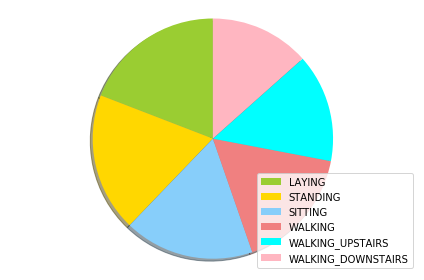

In [6]:
# Visualizing Outcome Distribution 
temp = train["Activity"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })


labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan','lightpink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [7]:
# Seperating Predictors and Outcome values from train and test sets
X_train = pd.DataFrame(train.drop(['Activity','subject'],axis=1))
Y_train_label = train.Activity.values.astype(object)
X_test = pd.DataFrame(test.drop(['Activity','subject'],axis=1))
Y_test_label = test.Activity.values.astype(object)

print(Y_train_label[0:5])

['WALKING_DOWNSTAIRS' 'WALKING' 'SITTING' 'SITTING' 'STANDING']


In [14]:
# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# encoding train labels 
encoder.fit(Y_train_label)
Y_train = encoder.transform(Y_train_label)

# encoding test labels 
encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)

print("First 5 element of Y_train:",Y_train[0:5])
print("First 5 element of Y_test:",Y_test[0:5])

First 5 element of Y_train: [4 3 1 1 2]
First 5 element of Y_test: [5 3 3 3 1]


In [15]:
# Dimension of Train and Test set and label
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")
print("Dimension of Train labels",Y_train.shape)
print("Dimension of Test labels",Y_test.shape,"\n")

Dimension of Train set (7352, 561)
Dimension of Test set (2947, 561) 

Dimension of Train labels (7352,)
Dimension of Test labels (2947,) 



In [16]:
#Total Number of Continous and Categorical features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

Number of numeric features: 561


In [17]:
# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [19]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [20]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

Best score for training data: 0.9874868778238692 



In [21]:
# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

Best C: 100 

Best Kernel: rbf 

Best Gamma: 0.001 



In [22]:
#select best model,predict and apply inverse transform to predict value
final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

In [23]:
# Making the Confusion Matrix

print(confusion_matrix(Y_test_label,Y_pred_label))
print("\n")
print(classification_report(Y_test_label,Y_pred_label))

print("Training set score for SVM: %f" % final_model.score(X_train_scaled , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , Y_test ))

[[537   0   0   0   0   0]
 [  3 440  47   0   0   1]
 [  0  13 519   0   0   0]
 [  0   0   0 486   4   6]
 [  0   0   0   6 389  25]
 [  0   0   0  15   2 454]]


                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.98      0.97       496
WALKING_DOWNSTAIRS       0.98      0.93      0.95       420
  WALKING_UPSTAIRS       0.93      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

Training set score for SVM: 1.000000
Testing  set score for SVM: 0.958602
